In [1]:
import os
import tensorflow as tf
from  icecream import ic
import keras
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

/Users/zoe/drv3/hm3/code/Diplomado_Copy/venv-metal/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Training with the Toronto Weights (Spoiler: is very bad)

In [2]:

## Check the initial configuration 
# ic is the "right printer for debugging"
ic ("TF Version   ", tf.__version__)
ic ("TF Path      ", tf.__path__[0])
ic ("Keras version ", keras.__version__)
ic ("numpy version ", np.__version__)
ic("This is ic")
ic("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

ic| 'TF Version   ', tf.__version__: '2.16.2'
ic| "TF Path      ": 'TF Path      '
    tf.__path__[0]: '/Users/zoe/drv3/hm3/code/Diplomado_Copy/venv-metal/lib/python3.9/site-packages/keras/api/_v2'
ic| 'Keras version ', keras.__version__: '3.8.0'
ic| 'numpy version ', np.__version__: '1.26.4'
ic| 'This is ic'
ic| "Num GPUs Available: ": 'Num GPUs Available: '
    len(tf.config.list_physical_devices('GPU')): 1


('Num GPUs Available: ', 1)

In [ ]:

def build_alexnet(input_shape=(224, 224, 3)):
    model = Sequential()

    # 1st Conv Layer
    model.add(Conv2D(48, (11, 11), strides=(4, 4), activation='relu', input_shape=input_shape, padding='same', name="conv1"))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid', name="pool1"))

    # 2nd Conv Layer
    model.add(Conv2D(256, (5, 5), strides=(1, 1), activation='relu', padding='same', name="conv2"))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid', name="pool2"))

    # 3rd Conv Layer
    model.add(Conv2D(384, (3, 3), strides=(1, 1), activation='relu', padding='same', name="conv3"))

    # 4th Conv Layer
    model.add(Conv2D(384, (3, 3), strides=(1, 1), activation='relu', padding='same', name="conv4"))

    # 5th Conv Layer
    model.add(Conv2D(256, (3, 3), strides=(1, 1), activation='relu', padding='same', name="conv5"))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid', name="pool5"))

    # Flatten
    model.add(Flatten())

    # Fully Connected Layer 1
    model.add(Dense(4096, activation='relu', name="fc6"))
    model.add(Dropout(0.5))

    # Fully Connected Layer 2
    model.add(Dense(4096, activation='relu', name="fc7"))
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(10, activation='softmax', name="fc8"))

    return model

# Build model
alexnet = build_alexnet()

/Users/zoe/drv3/hm3/code/Diplomado_Copy/venv-metal/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
ic| 'TF Version   ', tf.__version__: '2.16.2'
ic| "TF Path      ": 'TF Path      '
    tf.__path__[0]: '/Users/zoe/drv3/hm3/code/Diplomado_Copy/venv-metal/lib/python3.9/site-packages/keras/api/_v2'
ic| 'Keras version ', keras.__version__: '3.8.0'
ic| 'numpy version ', np.__version__: '1.26.4'
ic| 'This is ic'
ic| "Num GPUs Available: ": 'Num GPUs Available: '
    len(tf.config.list_physical_devices('GPU')): 1
/Users/zoe/drv3/hm3/code/Diplomado_Copy/venv-metal/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in 

In [3]:
cd = '/Users/zoe/drv3/hm3/code/Diplomado_Copy/tensorflow/alexNet'
path = '/Users/zoe/drv3/hm3/code/Diplomado_Copy/tensorflow/alexNet/bvlc_alexnet.npy'

In [4]:
os.chdir(cd)

In [8]:
ls

ScratchAlexNet_TF.h5     alexnet_TF.py            prelexNet_TF.ipynb
ScratchAlexNet_TF.keras  bvlc_alexnet.npy         scratch_AlexNet.jpg
alexNet_TF.ipynb         pre_AlexNet_weights.h5


In [ ]:
# Load pre-trained weights
weights_path = "bvlc_alexnet.npy"
weights_dict = np.load(weights_path, encoding='latin1', allow_pickle=True).item()

# Assign weights to layers
for layer in alexnet.layers:
    if layer.name in weights_dict:
        # print(True)
        weights = weights_dict[layer.name]
        print(f"Loaded weights for {layer.name}")

In [9]:
# Freeze initial convolutional layers (retain pre-trained features)
for layer in alexnet.layers[:-1]:  # Adjust as needed
    layer.trainable = False

# Compile model
alexnet.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
alexnet.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 56, 56, 48)     │        17,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 27, 27, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 27, 27, 256)    │       307,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv5 (Conv2D)                  │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool5 (MaxPooling2D)            │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc6 (Dense)                     │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc7 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc8 (Dense)                     │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,997,642 (221.24 MB)

 Trainable params: 40,970 (160.04 KB)

 Non-trainable params: 57,956,672 (221.09 MB)

In [10]:
# Resize function
def resize_images(images):
    images_resized = tf.image.resize(images, [224, 224])  # Resize to 224x224
    return images_resized


(x_train, y_train), (x_val, y_val) = tf.keras.datasets.cifar10.load_data()
x_train, x_val = x_train / 255.0, x_val / 255.0  # Normalize images

# Apply resizing
x_train = resize_images(x_train)  # Shape will now be (50000, 224, 224, 3)
x_val = resize_images(x_val)

# Load dataset (example: CIFAR-10 or custom dataset)


# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)

# Train the model (fine-tuning)
history = alexnet.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/20


2025-03-05 23:39:43.891831: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 71ms/step - accuracy: 0.1143 - loss: 2.2959 - val_accuracy: 0.1618 - val_loss: 2.2636
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 109s 137ms/step - accuracy: 0.1666 - loss: 2.2585 - val_accuracy: 0.2352 - val_loss: 2.2324
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 105s 132ms/step - accuracy: 0.1920 - loss: 2.2302 - val_accuracy: 0.2596 - val_loss: 2.2082
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 88s 111ms/step - accuracy: 0.2129 - loss: 2.2082 - val_accuracy: 0.2615 - val_loss: 2.1873
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 89s 112ms/step - accuracy: 0.2219 - loss: 2.1878 - val_accuracy: 0.2792 - val_loss: 2.1695
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 86s 109ms/step - accuracy: 0.2324 - loss: 2.1716 - val_accuracy: 0.2833 - val_loss: 2.1543
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 116ms/step - accuracy: 0.2338 - loss: 2.1629 - val_accuracy: 0.2768 - val_loss: 2.1402
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 109ms/step - accuracy: 0.2441 - loss: 2.1442 - va

/var/folders/vt/2dsss8hn19351fcd_gflc9nc0000gn/T/ipykernel_5217/3619560031.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-b" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs_range, acc, '-b', label='Training Accuracy', color = 'black')
/var/folders/vt/2dsss8hn19351fcd_gflc9nc0000gn/T/ipykernel_5217/3619560031.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-b" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs_range, loss, '-b', label='Training Loss', color = 'black')


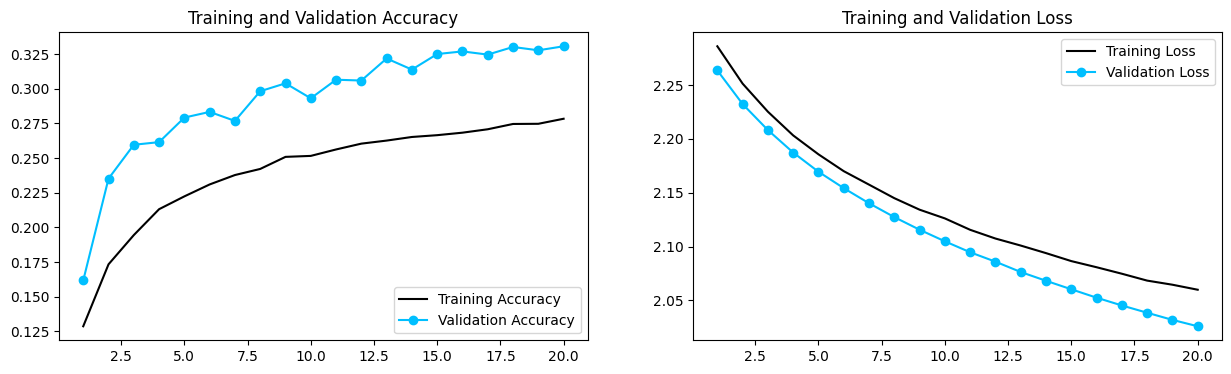

In [ ]:
# Plot Training History
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, 20+1)

plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, '-b', label='Training Accuracy', color = 'black')
plt.plot(epochs_range, val_acc, '-o' ,label='Validation Accuracy', color = 'deepskyblue')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, '-b', label='Training Loss', color = 'black')
plt.plot(epochs_range, val_loss, '-o' ,label='Validation Loss', color = 'deepskyblue')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('preTrain_CoffeAlexNet.jpg')

plt.show()

As we can see this weights clearly perform awfully UuU

## Training with the pre-trained model in Keras:

In [6]:
ls

ScratchAlexNet_TF.h5       bvlc_alexnet.npy
ScratchAlexNet_TF.keras    preTrain_CoffeAlexNEt.png
alexNet_TF.ipynb           preTrained_AlexNet_TF.jpg
alexNet_TF_pre.ipynb       pre_AlexNet_weights.h5
alexnet_TF.py              scratch_AlexNet.jpg


In [7]:
#Notice: I got this model from the previous training, as Keras/TF does't have a pre-trained model
new_model = tf.keras.models.load_model('ScratchAlexNet_TF.h5')
new_model.summary()

2025-03-07 01:35:50.616817: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-03-07 01:35:50.616860: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-03-07 01:35:50.616875: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-03-07 01:35:50.616904: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-07 01:35:50.616925: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 56, 56, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        40,970 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,322,315 (222.48 MB)

 Trainable params: 58,322,314 (222.48 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1 (8.00 B)

In [8]:
#freezing existing layers but the tail of the model:
for layer in new_model.layers[:-2]:
    layer.trainable = False

new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 56, 56, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        40,970 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,322,315 (222.48 MB)

 Trainable params: 40,970 (160.04 KB)

 Non-trainable params: 58,281,344 (222.33 MB)

 Optimizer params: 1 (8.00 B)

In [9]:
# deleting the tail of the model to re-train it
new_model.pop()

<Activation name=activation, built=True>

In [10]:
new_model.pop()

<Dense name=dense_2, built=True>

In [11]:
#checking:
new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 56, 56, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,281,345 (222.33 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 58,281,344 (222.33 MB)

 Optimizer params: 1 (8.00 B)

In [13]:
#adding a new layer with the same output and activation input

new_model.add(tf.keras.layers.Dense(10, activation='softmax', name = 'dense_2'))

In [87]:
#checking:
new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 56, 56, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,322,315 (222.48 MB)

 Trainable params: 40,970 (160.04 KB)

 Non-trainable params: 58,281,344 (222.33 MB)

 Optimizer params: 1 (8.00 B)

In [8]:
#prep data:

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

batch_size = 64

def resize_image(image, image_height=224, image_width=224):
    return tf.image.resize(image, [image_height, image_width])

def preprocess_image(image, label):
  
  image = image / 255
  image = resize_image(image)

  label = tf.one_hot(tf.squeeze(label), depth=10)

  return (image, label)


train_ds = tf.data.Dataset.from_tensor_slices((train_images,train_labels))
test_ds  = tf.data.Dataset.from_tensor_slices((test_images,test_labels))

train_ds_size = tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size  = tf.data.experimental.cardinality(test_ds).numpy()


#split between test and validation:
split = int(0.1 * len(train_images)) # split 10% to validation
valid_images = train_images[:split]
train_images = train_images[split:]

valid_labels = train_labels[:split]
train_labels = train_labels[split:]

#setting the test

test_ds =  tf.data.Dataset.from_tensor_slices((train_images,train_labels)) # defined above 
test_ds = (
    test_ds
    .map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
    # .cache()
    .shuffle(buffer_size=test_ds_size) # suffle the data to avoid/prevent bias
    .batch(batch_size,drop_remainder=True) # drop_reminder to dismiss the last batch if the size is small 
    .prefetch(tf.data.AUTOTUNE) # prefetch load  TF adjust automatically the pre-loaded data 
    ## Prefetching is a technique used to optimize data access by loading data into memory before it's actually needed. 
)

#setting validation

valid_ds = tf.data.Dataset.from_tensor_slices((valid_images, valid_labels))
valid_ds = (
    valid_ds
    .map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
    # .cache()
    .batch(batch_size,drop_remainder=True)
    .prefetch(tf.data.AUTOTUNE)
)

In [9]:
def data_augmentation(image, label):
## Data aumenttion function for our model 

  image = image / 255
  image = tf.image.resize(image, [256, 256])
  image = tf.image.random_flip_left_right(image)
  image = tf.image.random_crop(image, [224, 224, 3])

  # label sparse to categorical
  label = tf.one_hot(tf.squeeze(label), depth=10)

  return (image, label)

train_ds = tf.data.Dataset.from_tensor_slices((train_images,train_labels)) # defined above 
train_ds = (
    train_ds 
    .map(data_augmentation, num_parallel_calls=tf.data.AUTOTUNE)
    # .cache()
    .shuffle(buffer_size=test_ds_size) # suffle the data to avoid/prevent bias
    .batch(batch_size,drop_remainder=True) # drop_reminder to dismiss the last batch if the size is small 
    .prefetch(tf.data.AUTOTUNE) # prefetch load  TF adjust automatically the pre-loaded data 
    ## Prefetching is a technique used to optimize data access by loading data into memory before it's actually needed.
)

In [17]:
def train_model(epochs=20):

  ##train AlexNet model 

 
  new_model.summary()

  init_lr = 0.01
  decay_steps = 10000
  decay_rate = 0.96
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=init_lr, decay_steps=decay_steps, decay_rate=decay_rate)

  optimizer = SGD(learning_rate=lr_schedule, momentum=0.9)
  new_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  history = new_model.fit(
      x=train_ds,
      validation_data=valid_ds,
      epochs=epochs,
    )
  return history, new_model

# Train model
history, new_model = train_model(epochs=20)

new_model.evaluate(
    test_ds
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 56, 56, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,363,285 (222.64 MB)

 Trainable params: 40,970 (160.04 KB)

 Non-trainable params: 58,281,344 (222.33 MB)

 Optimizer params: 40,971 (160.05 KB)

Epoch 1/20
703/703 ━━━━━━━━━━━━━━━━━━━━ 43s 58ms/step - accuracy: 0.8449 - loss: 0.4439 - val_accuracy: 0.8019 - val_loss: 0.6123
Epoch 2/20
703/703 ━━━━━━━━━━━━━━━━━━━━ 41s 57ms/step - accuracy: 0.8477 - loss: 0.4432 - val_accuracy: 0.8045 - val_loss: 0.6098
Epoch 3/20
703/703 ━━━━━━━━━━━━━━━━━━━━ 39s 55ms/step - accuracy: 0.8435 - loss: 0.4503 - val_accuracy: 0.8027 - val_loss: 0.6202
Epoch 4/20
703/703 ━━━━━━━━━━━━━━━━━━━━ 40s 56ms/step - accuracy: 0.8462 - loss: 0.4419 - val_accuracy: 0.8069 - val_loss: 0.6065
Epoch 5/20
703/703 ━━━━━━━━━━━━━━━━━━━━ 41s 58ms/step - accuracy: 0.8485 - loss: 0.4405 - val_accuracy: 0.8041 - val_loss: 0.6074
Epoch 6/20
703/703 ━━━━━━━━━━━━━━━━━━━━ 40s 56ms/step - accuracy: 0.8433 - loss: 0.4478 - val_accuracy: 0.8021 - val_loss: 0.6121
Epoch 7/20
703/703 ━━━━━━━━━━━━━━━━━━━━ 40s 57ms/step - accuracy: 0.8465 - loss: 0.4447 - val_accuracy: 0.8027 - val_loss: 0.6082
Epoch 8/20
703/703 ━━━━━━━━━━━━━━━━━━━━ 40s 56ms/step - accuracy: 0.8454 - loss: 0.4464 - 

[0.4129054844379425, 0.8583526015281677]

/var/folders/vt/2dsss8hn19351fcd_gflc9nc0000gn/T/ipykernel_15929/2578181427.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-b" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs_range, acc, '-b', label='Training Accuracy', color = 'black')
/var/folders/vt/2dsss8hn19351fcd_gflc9nc0000gn/T/ipykernel_15929/2578181427.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-b" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs_range, loss, '-b', label='Training Loss', color = 'black')


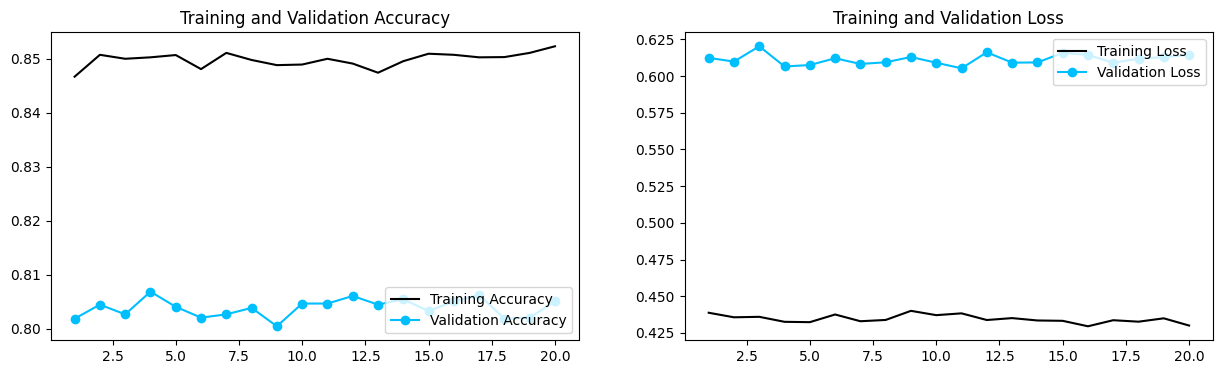

In [18]:
# Plot Training History (Optional but very useful)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, 20+1)

plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, '-b', label='Training Accuracy', color = 'black')
plt.plot(epochs_range, val_acc, '-o' ,label='Validation Accuracy', color = 'deepskyblue')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, '-b', label='Training Loss', color = 'black')
plt.plot(epochs_range, val_loss, '-o' ,label='Validation Loss', color = 'deepskyblue')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('preTrained_AlexNet_TF.jpg')

plt.show()

From this model we can see clear signs of weak learning, because of the last layer being to simple to keep learning more complex patters, so I'm going to train with the full model to examine the curves

In [13]:
#
new_modelM = tf.keras.models.load_model('ScratchAlexNet_TF.h5')
new_modelM.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 56, 56, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        40,970 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,322,315 (222.48 MB)

 Trainable params: 58,322,314 (222.48 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1 (8.00 B)

In [16]:
def train_model(epochs=20):

  ##train AlexNet model 

 
  new_modelM.summary()

  init_lr = 0.01
  decay_steps = 10000
  decay_rate = 0.96
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=init_lr, decay_steps=decay_steps, decay_rate=decay_rate)

  optimizer = SGD(learning_rate=lr_schedule, momentum=0.9)
  new_modelM.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  history = new_modelM.fit(
      x=train_ds,
      validation_data=valid_ds,
      epochs=epochs,
    )
  return history, new_modelM

# Train model
history, new_modelM = train_model(epochs=20)

new_modelM.evaluate(
    test_ds
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 56, 56, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        40,970 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 116,644,629 (444.96 MB)

 Trainable params: 58,322,314 (222.48 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 58,322,315 (222.48 MB)

Epoch 1/20
703/703 ━━━━━━━━━━━━━━━━━━━━ 133s 184ms/step - accuracy: 0.8160 - loss: 0.5425 - val_accuracy: 0.7804 - val_loss: 0.6735
Epoch 2/20
703/703 ━━━━━━━━━━━━━━━━━━━━ 131s 184ms/step - accuracy: 0.8231 - loss: 0.5241 - val_accuracy: 0.7732 - val_loss: 0.7085
Epoch 3/20
703/703 ━━━━━━━━━━━━━━━━━━━━ 132s 185ms/step - accuracy: 0.8152 - loss: 0.5424 - val_accuracy: 0.7696 - val_loss: 0.7382
Epoch 4/20
703/703 ━━━━━━━━━━━━━━━━━━━━ 130s 184ms/step - accuracy: 0.8188 - loss: 0.5412 - val_accuracy: 0.7640 - val_loss: 0.7551
Epoch 5/20
703/703 ━━━━━━━━━━━━━━━━━━━━ 130s 184ms/step - accuracy: 0.8102 - loss: 0.5652 - val_accuracy: 0.7893 - val_loss: 0.6762
Epoch 6/20
703/703 ━━━━━━━━━━━━━━━━━━━━ 131s 185ms/step - accuracy: 0.8144 - loss: 0.5421 - val_accuracy: 0.7977 - val_loss: 0.6709
Epoch 7/20
703/703 ━━━━━━━━━━━━━━━━━━━━ 130s 184ms/step - accuracy: 0.8215 - loss: 0.5290 - val_accuracy: 0.7945 - val_loss: 0.6693
Epoch 8/20
703/703 ━━━━━━━━━━━━━━━━━━━━ 131s 186ms/step - accuracy: 0.8260 -

[0.5681190490722656, 0.8209237456321716]

/var/folders/vt/2dsss8hn19351fcd_gflc9nc0000gn/T/ipykernel_17025/2578181427.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-b" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs_range, acc, '-b', label='Training Accuracy', color = 'black')
/var/folders/vt/2dsss8hn19351fcd_gflc9nc0000gn/T/ipykernel_17025/2578181427.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-b" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs_range, loss, '-b', label='Training Loss', color = 'black')


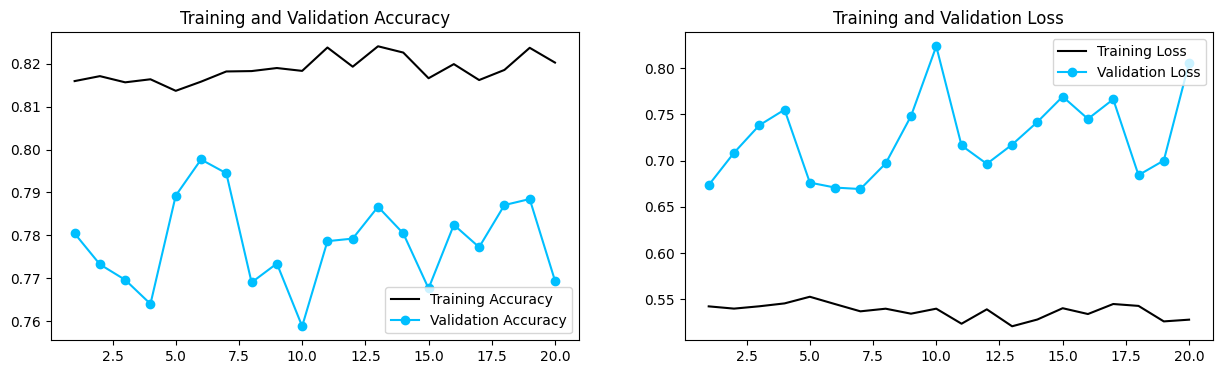

In [18]:
# Plot Training History (Optional but very useful)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, 20+1)

plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, '-b', label='Training Accuracy', color = 'black')
plt.plot(epochs_range, val_acc, '-o' ,label='Validation Accuracy', color = 'deepskyblue')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, '-b', label='Training Loss', color = 'black')
plt.plot(epochs_range, val_loss, '-o' ,label='Validation Loss', color = 'deepskyblue')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('preTrained_AlexNet_TF.jpg')

plt.show()